<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/Hierachical_and_Kmeans_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **LOADING THE DATASET**

In [ ]:
df = pd.read_csv('Credit_card_dataset.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


## **CHECKING FOR MISSING VALUES**

In [ ]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

## **SELECTING THE PURCHASE AND CREDIT_LIMIT FEATURES**

In [ ]:

X = df.iloc[:, [2, 4]]
X

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


## **FILLNA WITH ZERO**

In [ ]:
X['CREDIT_LIMIT'] = X['CREDIT_LIMIT'].fillna(0)

<ipython-input-8-a9ead3e7b410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CREDIT_LIMIT'] = X['CREDIT_LIMIT'].fillna(0)


In [ ]:
X.isnull().sum()

PURCHASES       0
CREDIT_LIMIT    0
dtype: int64

In [ ]:
X

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


# **Dendrogram to find optimal number of Clusters**

Text(0, 0.5, 'Euclidean distance')

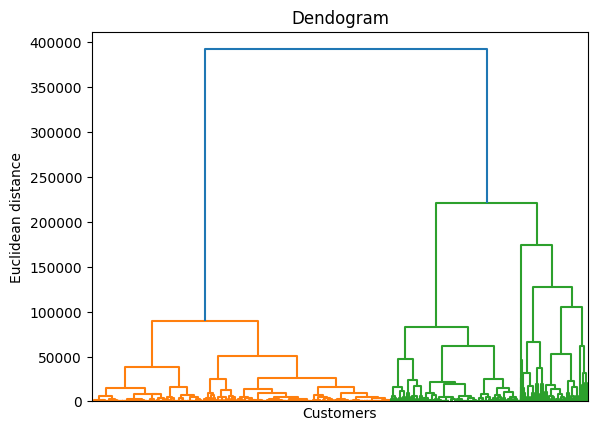

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

## **BUILDING THE HIERACHICAL MODEL**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X)

## **PLOTTING THE CLUSTERS**

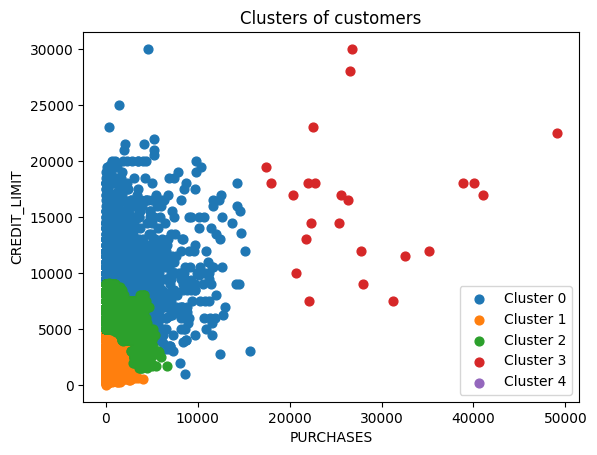

In [24]:
for i in range(5):
    plt.scatter(X.values[hc_labels == i, 0], X.values[hc_labels == i, 1], s=40, label='Cluster ' + str(i))

plt.title('Clusters of customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

In [ ]:
import sklearn
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

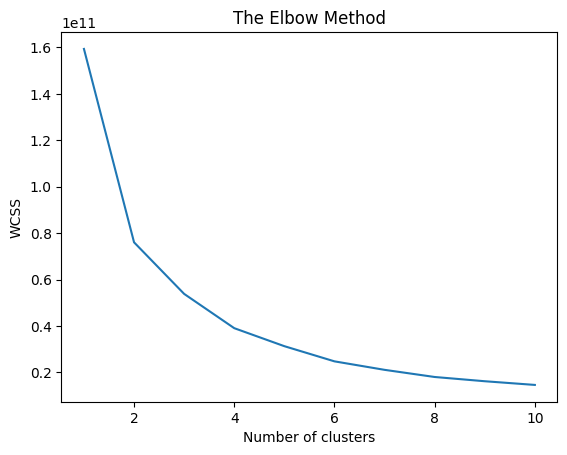

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=0)

y_kmeans = kmeansmodel.fit_predict(X)

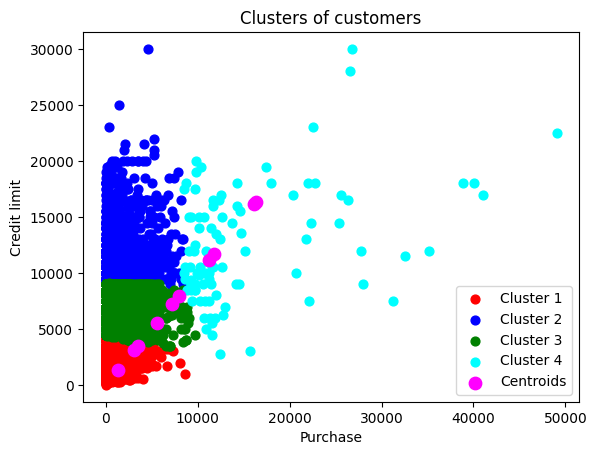

In [33]:
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=40, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=40, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=40, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=40, c='cyan', label='Cluster 4')

# plt.scatter(X.values[y_kmeans == 0, 1], X.values[y_kmeans == 0, 1], s=40, c='red', label='Cluster 1')
# plt.scatter(X.values[y_kmeans == 1, 1], X.values[y_kmeans == 1, 1], s=40, c='blue', label='Cluster 2')
# plt.scatter(X.values[y_kmeans == 2, 1], X.values[y_kmeans == 2, 1], s=40, c='green', label='Cluster 3')
# plt.scatter(X.values[y_kmeans == 3, 1], X.values[y_kmeans == 3, 1], s=40, c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s=80, c='magenta', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchase')
plt.ylabel('Credit limit')
plt.legend()
plt.show()

From the above, Customers are grouped based on Credit Limit and number of purchases.